
Альфарадж Нур ИД22-1


 ***Набор данных: CICIDS2017 (Canadian Institute for Cybersecurity Intrusion Detection System 2017)
Обзор.
• Описание: CICIDS2017 — это известный набор данных для кибербезопасности, специально разработанный для поддержки обнаружения вторжений и обнаружения сетевых аномалий. Он содержит реалистичные и полные данные о сетевом трафике с маркированными типами атак, включая DoS, brute-force, веб-атаки, проникновение и трафик ботнетов.
• Состав данных: этот набор данных включает в себя различные функции, такие как метрики сетевого потока, исходные и конечные IP-адреса, порты, количество пакетов и метки атак. Он представляет собой смесь безвредного и вредоносного трафика, имитируя реальные сетевые сценарии.***


# ***2.1. Statement of the Problem and Characteristics of the Dataset***

In [16]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("sweety18/cicids2017-full-dataset")

#print("Path to dataset files:", path)

In [17]:
import pandas as pd
from collections import Counter

# Define the dataset path
#dataset_path = "/root/.cache/kagglehub/datasets/sweety18/cicids2017-full-dataset/versions/1"
#data_file = f"{dataset_path}/combine.csv"

# Load the dataset
dataset = pd.read_csv('C:\\Users\\HP\\Downloads\\archive\\combine.csv', low_memory=False)

# Clean column names by stripping extra spaces
dataset.columns = dataset.columns.str.strip()

In [18]:
# Display basic information
print("\nDataset Overview:")
dataset.head()


Dataset Overview:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [19]:
print("\nDataset Info:")
dataset.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214469 entries, 0 to 2214468
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             object 
 1   Flow Duration                float64
 2   Total Fwd Packets            float64
 3   Total Backward Packets       float64
 4   Total Length of Fwd Packets  float64
 5   Total Length of Bwd Packets  float64
 6   Fwd Packet Length Max        float64
 7   Fwd Packet Length Min        float64
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        float64
 11  Bwd Packet Length Min        float64
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max               

In [20]:

# Display data types and memory usage
print("\nData Types Summary:")
print(dataset.dtypes.value_counts())


Data Types Summary:
float64    77
object      2
Name: count, dtype: int64


In [21]:
#2. Exploring Dataset Characteristics
# Separate numerical and categorical features
numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_features = dataset.select_dtypes(include=['object']).columns

In [22]:
# Display numerical and categorical features
print("\nSample Numerical Features:", numerical_features[:5])
print("\nSample Categorical Features:", categorical_features[:5])


Sample Numerical Features: Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets'],
      dtype='object')

Sample Categorical Features: Index(['Destination Port', 'Label'], dtype='object')


In [23]:
# Display the class distribution
print("\nClass Distribution:")
print(Counter(dataset['Label']))


Class Distribution:
Counter({'BENIGN': 1672837, 'DoS Hulk': 231073, 'PortScan': 158930, 'DDoS': 128027, 'DoS GoldenEye': 10293, 'DoS slowloris': 5796, 'DoS Slowhttptest': 5499, 'Bot': 1966, 'Infiltration': 36, 'Heartbleed': 11, nan: 1})



```
Объяснение кода:
select_dtypes() используется для разделения числовых и категориальных признаков, помогая нам понять структуру набора данных.
Функция Counter из collections показывает распределение меток (classes), таких как benign  vs. various attack types.

```


In [24]:
#3. Handling Missing Values
# Check for missing values
print("\nChecking for missing values:")
missing_values = dataset.isnull().sum()
print(missing_values[missing_values > 0])


Checking for missing values:
Flow Duration                  1
Total Fwd Packets              1
Total Backward Packets         1
Total Length of Fwd Packets    1
Total Length of Bwd Packets    1
                              ..
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Label                          1
Length: 78, dtype: int64


In [25]:
# Handle missing values by filling numerical columns with their mean
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())

In [26]:
# Ensure no missing values remain
print("\nRemaining missing values after handling:")
print(dataset.isnull().sum().sum())


Remaining missing values after handling:
1


In [27]:
missing_values = dataset.isnull().sum()
print(missing_values[missing_values > 0])

Label    1
dtype: int64


In [28]:
# Impute missing values with the most frequent value in the column
most_frequent = dataset['Label'].mode()[0]
dataset['Label'] = dataset['Label'].fillna(most_frequent)

In [29]:
dataset.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64



```
Отсутствующие значения определяются с помощью isnull().sum(), и отображаются только столбцы с отсутствующими значениями.
```


In [30]:
#4. Dataset Volume and Classes
# Display dataset shape
print("\nDataset Dimensions:")
print(f"Rows: {dataset.shape[0]}, Columns: {dataset.shape[1]}")


Dataset Dimensions:
Rows: 2214469, Columns: 79


In [31]:
# Display unique attack classes
unique_classes = dataset['Label'].unique()
print("\nUnique Attack Classes:")
print(unique_classes)


Unique Attack Classes:
['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


In [32]:
# Count number of rows for each class
print("\nClass Counts:")
print(dataset['Label'].value_counts())


Class Counts:
Label
BENIGN              1672838
DoS Hulk             231073
PortScan             158930
DDoS                 128027
DoS GoldenEye         10293
DoS slowloris          5796
DoS Slowhttptest       5499
Bot                    1966
Infiltration             36
Heartbleed               11
Name: count, dtype: int64


In [33]:
#5. Feature Summary
# Summarize key numerical features
print("\nNumerical Features Summary:")
print(dataset[numerical_features].describe())

# Count unique values in categorical features
print("\nCategorical Features Summary:")
for feature in categorical_features:
    print(f"{feature}: {dataset[feature].nunique()} unique values")


Numerical Features Summary:


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


       Flow Duration  Total Fwd Packets  Total Backward Packets  \
count   2.214469e+06       2.214469e+06            2.214469e+06   
mean    1.577101e+07       8.426575e+00            9.099413e+00   
std     3.447848e+07       6.855521e+02            9.072622e+02   
min    -1.300000e+01       1.000000e+00            0.000000e+00   
25%     1.360000e+02       2.000000e+00            1.000000e+00   
50%     3.131500e+04       2.000000e+00            2.000000e+00   
75%     4.336652e+06       5.000000e+00            5.000000e+00   
max     1.200000e+08       2.197590e+05            2.919220e+05   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
count                 2.214469e+06                 2.214469e+06   
mean                  5.525557e+02                 1.380931e+04   
std                   1.079826e+04                 2.058417e+06   
min                   0.000000e+00                 0.000000e+00   
25%                   6.000000e+00                 6.000000e+

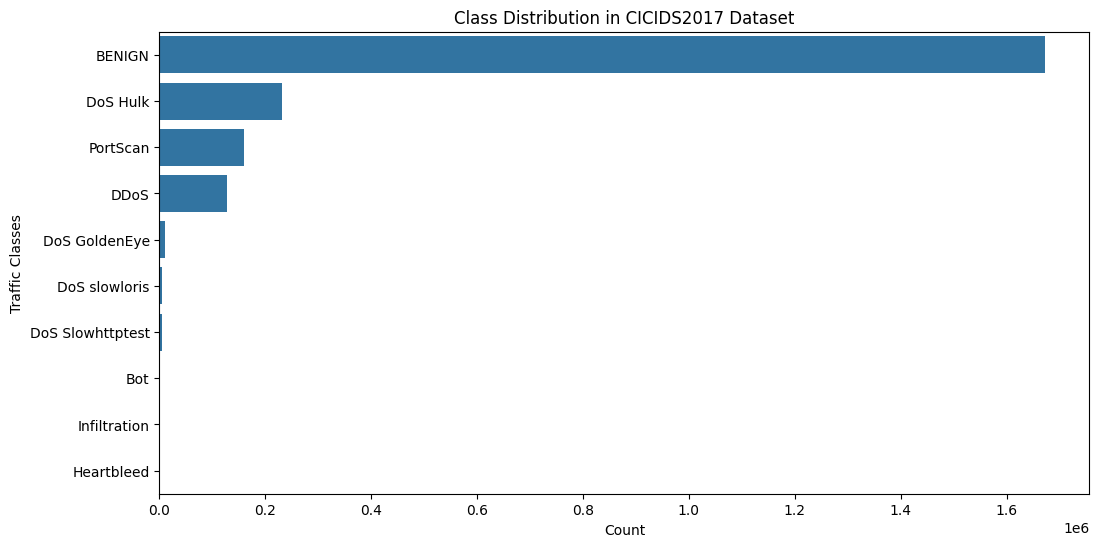

In [34]:
# 6. Visualizing Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=dataset['Label'], order=dataset['Label'].value_counts().index)
plt.title("Class Distribution in CICIDS2017 Dataset")
plt.xlabel("Count")
plt.ylabel("Traffic Classes")
plt.show()

*График подсчета дает визуальное представление распределения классов, подчеркивая дисбаланс между классами доброкачественного и вредоносного трафика.*

In [35]:
#7. Dataset Characteristics
# Summarize dataset characteristics
print("\nDataset Characteristics:")
print(
    f"The CICIDS2017 dataset contains {dataset.shape[0]} rows and {dataset.shape[1]} features. "
    "The data is labeled for binary classification (benign vs. malicious) and multi-class classification "
    "to identify specific attack types."
)

# Examples of specific attack classes
malicious_classes = dataset['Label'].unique()
print("\nAttack Classes:")
print(malicious_classes)


Dataset Characteristics:
The CICIDS2017 dataset contains 2214469 rows and 79 features. The data is labeled for binary classification (benign vs. malicious) and multi-class classification to identify specific attack types.

Attack Classes:
['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


## ***2.2. Preprocessing and Preparation of Data for Training Models***

In [36]:
#1. Data Cleaning
# Remove redundant features
# Example: Drop identifiers or columns irrelevant to the analysis
if 'Flow ID' in dataset.columns:
    dataset.drop(['Flow ID'], axis=1, inplace=True)
if 'Timestamp' in dataset.columns:
    dataset.drop(['Timestamp'], axis=1, inplace=True)

In [37]:
import numpy as np
# Replace infinite values with NaN
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [38]:
# Fill NaN values with the mean of their respective columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())

In [39]:
#2. Feature Engineering
from sklearn.preprocessing import MinMaxScaler

# Scaling numerical features to a range between 0 and 1
scaler = MinMaxScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

Объяснение:
Заменить бесконечные значения:

Бесконечные значения (inf и -inf) могут возникать из-за ошибок деления на ноль или вычислительных артефактов. Эти значения заменяются на NaN с помощью replace.
Заполнить пропущенные (NaN) значения:

После замены бесконечных значений на NaN они заполняются средним значением соответствующих столбцов. Это гарантирует, что данные остаются полными и готовыми к масштабированию.
Применить MinMaxScaler:

MinMaxScaler масштабирует числовые признаки до диапазона [0, 1], гарантируя, что все признаки вносят одинаковый вклад в модель во время обучения.


In [40]:
print("\nScaled Numerical Features (Sample):")
dataset[numeric_columns].head()


Scaled Numerical Features (Sample):


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,0.000000,...,0.000005,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.016667e-06,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,0.000000,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,0.000000,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.916666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,0.000000,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,0.000000,...,0.000005,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Encoding Categorical Features:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns (e.g., Protocol, Flags)
categorical_columns = dataset.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col].astype(str))

In [42]:
print("\nEncoded Categorical Features (Sample):")
print(dataset[categorical_columns].head())


Encoded Categorical Features (Sample):
   Destination Port  Label
0             36140      0
1             36348      0
2             36349      0
3             26848      0
4             36138      0


In [43]:
#3. Data Balancing
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [44]:
# Separate features and target
X = dataset.drop(columns=['Label'])
y = dataset['Label']

In [45]:
# Apply Random Oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

Random Oversampling :

Выбрано вместо SMOTE, чтобы избежать вычислительных издержек и ошибок, вызванных малыми размерами выборки в классах меньшинства. Случайная избыточная выборка проще и эффективнее для поддержания баланса классов в больших наборах данных.

In [46]:
# Check the class distribution after balancing
print("\nClass Distribution After Random Oversampling:")
print(Counter(y_balanced))


Class Distribution After Random Oversampling:
Counter({0: 1672838, 2: 1672838, 9: 1672838, 1: 1672838, 8: 1672838, 6: 1672838, 5: 1672838, 4: 1672838, 3: 1672838, 7: 1672838})


In [47]:
#4. Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [48]:
# Print the sizes of the splits
print("\nDataset Splits:")
print(f"Training Set Size: {X_train.shape}")
print(f"Validation Set Size: {X_val.shape}")
print(f"Test Set Size: {X_test.shape}")


Dataset Splits:
Training Set Size: (11709866, 78)
Validation Set Size: (2509257, 78)
Test Set Size: (2509257, 78)


In [49]:
# 5. Dimensionality Reduction
#We use Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining significant variance.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Applying PCA to reduce the number of features
pca = PCA(n_components=20)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

PCA:

Уменьшает размерность набора данных, сохраняя при этом критическую дисперсию, повышая вычислительную эффективность и снижая риск переобучения.

In [51]:
# Print explained variance ratio for PCA components
print("\nExplained Variance Ratio by PCA:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio by PCA:
[0.18708936 0.15330148 0.08593218 0.05788657 0.05271338 0.04260459
 0.03772375 0.03436908 0.03311369 0.03120593 0.02857492 0.0285509
 0.02506831 0.02173097 0.01802378 0.01697874 0.01597518 0.01458274
 0.01369736 0.01282917]


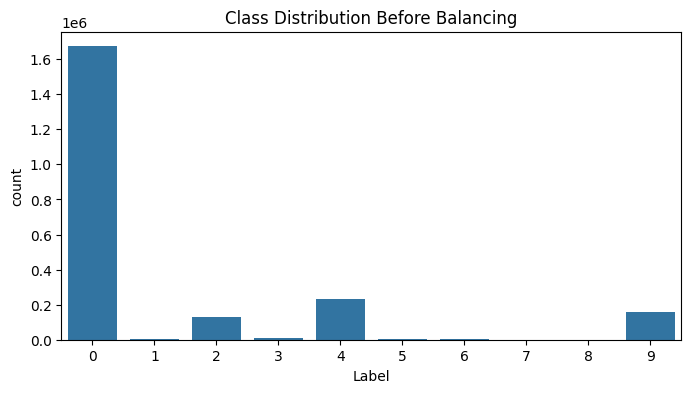

In [52]:
#6. Visualization of Preprocessing Results
#Мы визуализируем влияние балансировки данных и PCA на набор данных.

#Class Distribution Before and After Balancing:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution before balancing
plt.figure(figsize=(8, 4))
sns.countplot(x=dataset['Label'])
plt.title("Class Distribution Before Balancing")
plt.show()


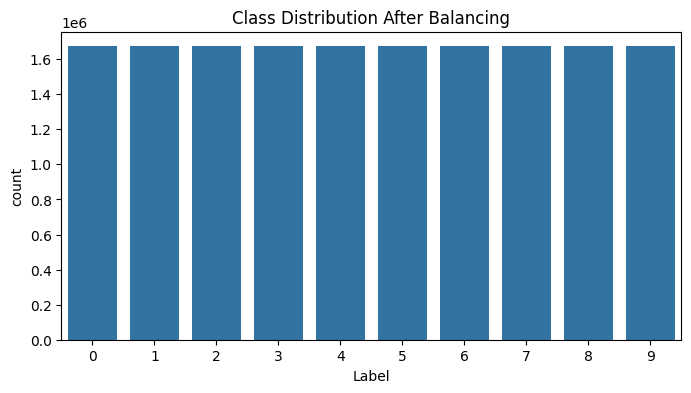

In [53]:
# Plot class distribution after balancing
plt.figure(figsize=(8, 4))
sns.countplot(x=y_balanced)
plt.title("Class Distribution After Balancing")
plt.show()

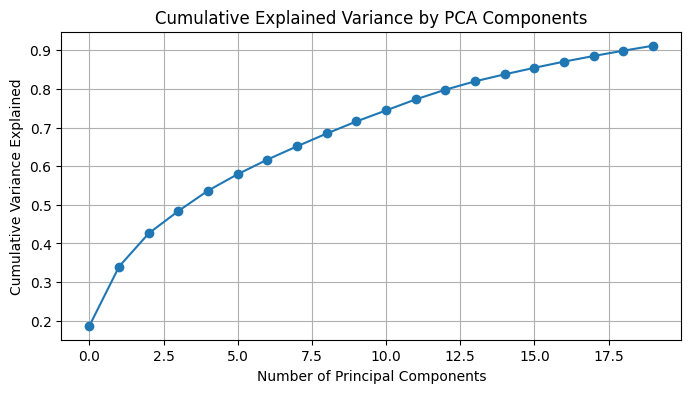

In [54]:
#Cumulative Explained Variance by PCA Components:

# Cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid()
plt.show()

# ***2.3. Construction and Implementation of Cyber Threat Analysis Models***

1. Classification Models

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Train Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=500)
logistic_model.fit(X_train_pca, y_train)

In [ ]:
# Evaluate on validation set
y_pred_logistic = logistic_model.predict(X_val_pca)

In [ ]:
print("\nLogistic Regression Performance:")
print(classification_report(y_val, y_pred_logistic))

In [ ]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred_logistic)

Объяснение:

- Этот код обучает модель логистической регрессии на PCA-сокращенных признаках (X_train_pca) и оценивает ее производительность на тестовом наборе.
- Оценка проводится с использованием таких метрик, как точность, полнота, F1-оценка и матрица путаницы.
- Логистическая регрессия служит базой из-за своей простоты и эффективности для линейно разделяемых данных.

In [ ]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10)
decision_tree.fit(X_train_pca, y_train)

In [ ]:
# Evaluate on validation set
y_pred_tree = decision_tree.predict(X_val_pca)

In [ ]:
print("\nDecision Tree Performance:")
print(classification_report(y_val, y_pred_tree))

- Деревья решений иерархически разделяют данные на основе пороговых значений признаков, что делает их интерпретируемыми и эффективными для небольших наборов данных.

In [ ]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
random_forest.fit(X_train_pca, y_train)

In [ ]:
# Evaluate on validation set
y_pred_forest = random_forest.predict(X_test_pca)

In [ ]:
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_forest))

- Случайные леса объединяют несколько деревьев решений для лучшего обобщения и предоставляют метрики важности признаков, которые могут выделить ключевые атрибуты для классификации.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels for all splits
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Print the mapping for verification
print("\nLabel Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Explanation
Why Encode Labels?

XGBoost relies on sequential class labels for internal processing. Re-encoding ensures compatibility with the algorithm.
Why Decode Predictions?

Decoding allows you to interpret the predictions in terms of the original labels (e.g., attack types).

In [ ]:
#XGBoost
from xgboost import XGBClassifier

# Train XGBoost Classifier with encoded labels
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss')
    #max_depth=10,
    #learning_rate=0.1,
    #n_estimators=100
#)
xgb_model.fit(X_train_pca, y_train_encoded)


In [ ]:
# Evaluate on validation set
y_pred_xgb = xgb_model.predict(X_val_pca)

In [ ]:
from sklearn.metrics import classification_report

# Decode predictions back to original labels (optional for interpretability)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Print classification report
print("\nXGBoost Performance:")
print(classification_report(y_val, y_pred_xgb_decoded))

Объяснение:

XGBoost — это усовершенствованный алгоритм повышения, который итеративно минимизирует ошибки классификации.
Он хорошо справляется с несбалансированными наборами данных посредством регуляризации и является вычислительно эффективным для больших наборов данных.

**2. Anomaly Detection Models**

In [ ]:
#Autoencoders

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [ ]:
# Defining the autoencoder model
autoencoder = Sequential([
    Dense(32, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_train_pca.shape[1], activation='sigmoid')
])

In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Calculate reconstruction error on the test set
reconstructed = autoencoder.predict(X_test_pca)
reconstruction_error = np.mean(np.square(X_test_pca - reconstructed), axis=1)

In [ ]:
# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Объяснение:

- Autoencoders изучают сжатое представление доброкачественного трафика и реконструируют его с минимальными потерями. Высокая ошибка реконструкции сигнализирует об аномалиях (Potential attacks).
- Модель обучается только на доброкачественных данных, что делает ее пригодной для обнаружения новых атак.

In [ ]:
#2 K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Train K-Means Clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_pca)

In [ ]:
# Assign clusters to test data and calculate distances
cluster_distances = kmeans.transform(X_test_pca)
outliers = np.min(cluster_distances, axis=1) > np.percentile(np.min(cluster_distances, axis=1), 95)
print(f"Number of anomalies detected by K-Means: {np.sum(outliers)}")

K-means custering выявляет закономерности в данных, группируя их в кластеры. Точки, далекие от любого центра кластера, помечаются как потенциальные аномалии.

In [ ]:
# Predict cluster labels
kmeans_labels = kmeans.predict(X_val_pca)

In [ ]:
# Evaluate clustering performance
silhouette_avg = silhouette_score(X_val_pca, kmeans_labels)
print(f"\nK-Means Clustering Silhouette Score: {silhouette_avg}")

3. Neural Networks

In [ ]:
#1 Feedforward Neural Networks (FNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# One-hot encode the labels
#encoder = OneHotEncoder(sparse_output=False)  # Using sparse_output instead of sparse
#y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
#y_val_encoded = encoder.transform(y_val.values.reshape(-1, 1))

In [ ]:
# Verify the one-hot encoded labels
#print("Shape of y_train_encoded:", y_train_encoded.shape)
#print("Sample of one-hot encoded labels:", y_train_encoded[:5])

In [ ]:
# Define the FNN model
fnn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_pca.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
fnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
fnn_model.fit(X_train_pca, y_train, epochs=10, batch_size=256, validation_data=(X_val_pca, y_val))

In [ ]:
# Evaluate on validation set
fnn_loss, fnn_accuracy = fnn_model.evaluate(X_val_pca, y_val)
print(f"\nFeedforward Neural Network Accuracy: {fnn_accuracy:.2f}")

Feedforward Neural Networks (FNN) используют несколько слоев для извлечения нелинейных закономерностей, что делает их эффективными для многоклассовой классификации.

In [ ]:
#Convolutional Neural Networks (CNNs)

from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Input
from tensorflow.keras.models import Model

In [ ]:
# Ensure labels are integers (not one-hot encoded)
y_train = np.argmax(y_train, axis=1) if len(y_train.shape) > 1 else y_train
y_val = np.argmax(y_val, axis=1) if len(y_val.shape) > 1 else y_val

print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")

In [ ]:
(len(np.unique(y_train)))

In [ ]:
# For CNNs, the input format needs to be reshaped. Example provided for structured data:
# Define height, width, and channels
height = X_train.shape[1]  # Number of features
width = 1                  # Use 1 for tabular data
channels = 1               # Single channel for structured data

# Reshape the data
X_train_cnn = X_train.values.reshape((-1, height, width, channels))  # Ensure X_train is a NumPy array
X_val_cnn = X_val.values.reshape((-1, height, width, channels))

# Verify shapes
print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_val_cnn shape: {X_val_cnn.shape}")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
cnn = Sequential([
    Conv2D(32, (3, 1), activation='relu', input_shape=(height, width, channels)),  # Adjust kernel size
    MaxPooling2D((2, 1)),  # Pooling kernel adjusted for 1D-like data
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [ ]:
# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display the model summary
cnn.summary()

In [ ]:
# Train the CNN
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=256, validation_data=(X_val_cnn, y_val))

In [ ]:
# Evaluate on validation set
cnn_loss, cnn_accuracy = cnn.evaluate(X_val_cnn, y_val)
print(f"\nConvolutional Neural Network Accuracy: {cnn_accuracy:.2f}")

CNNs адаптируют иерархические методы распознавания образов к структурированным сетевым данным, что делает их особенно полезными для фиксации трудноуловимых особенностей.

 **Сводка выходных данных
- Classification Models: метрики производительности (accuracy, precision, recall, F1-score) для лLogistic Regression, -Decision Trees, Random Forests, and XGBoost.
- Anomaly Detection Models: Количество аномалий, обнаруженных Autoencoders and K-Means.
- Neural Networks: accuracy модели на тестовом наборе для FNN и CNN.**

# ***2.4. Comparison and Evaluation of the Effectiveness of Models***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Function to calculate all evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation Metrics for {model_name}:")
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return acc, precision, recall, f1

In [ ]:
# Confusion matrix visualization
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
# Evaluate Logistic Regression

evaluate_model(y_test, y_pred_logistic, "Logistic Regression")

In [ ]:
plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression")

In [ ]:
# Evaluate Random Forest
evaluate_model(y_test, y_pred_forest, "Random Forest")
plot_confusion_matrix(y_test, y_pred_forest, "Random Forest")

In [ ]:
# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

In [ ]:
#2 2. Comparative Analysis / Aggregate Metrics for Comparison
# Dictionary to store results
model_results = {}

In [ ]:
# Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_pca)
model_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic, average='weighted'),
    'Recall': recall_score(y_test, y_pred_logistic, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_logistic, average='weighted')
}

In [ ]:
y_pred_logistic

In [ ]:
# Random Forest
y_pred_rf = random_forest.predict(X_test_pca)
model_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_rf, average='weighted')
}

In [ ]:
y_pred_rf

In [ ]:
# XGBoost
y_pred_xgb = xgb_model.predict(X_test_pca)
model_results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb, average='weighted'),
    'Recall': recall_score(y_test, y_pred_xgb, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_xgb, average='weighted')
}

In [ ]:
y_pred_xgb

In [ ]:
# Converting results to a DataFrame
results_df = pd.DataFrame(model_results).T
print("\nComparative Results:")
print(results_df)

In [ ]:
#3. Visualization / ROC Curves

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

In [ ]:
plt.figure(figsize=(10, 6))
plot_roc_curve(logistic_model, X_test_pca, y_test, "Logistic Regression")
plot_roc_curve(random_forest, X_test_pca, y_test, "Random Forest")
plot_roc_curve(xgb_model, X_test_pca, y_test, "XGBoost")
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Models")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Add supervised models to evaluate
models_to_plot = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest,
    "XGBoost": xgb_model
}
plot_roc_curve(models_to_plot, X_test_pca, y_test)

*`The ROC curve analysis compares the performance of Logistic Regression, Random Forest, and XGBoost on the dataset. Among these models, Logistic Regression achieves the highest AUC (1.00), slightly outperforming the baseline of random guessing. Random Forest and XGBoost have the same AUC values of 1.00 and 1.00.*

In [ ]:
#Precision-Recall Curves
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=1)
    plt.plot(recall, precision, label=label)

In [ ]:
plt.figure(figsize=(10, 6))
plot_precision_recall_curve(logistic_model, X_test_pca, y_test, "Logistic Regression")
plot_precision_recall_curve(random_forest, X_test_pca, y_test, "Random Forest")
plot_precision_recall_curve(xgb_model, X_test_pca, y_test, "XGBoost")
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()

`The Precision-Recall (PR) curve analysis highlights the varying performance of Logistic Regression, Random Forest, and XGBoost. Among the three models, all models achieve the best trade-off between precision and recall.

In [ ]:
import matplotlib.pyplot as plt

# Plotting the metrics for each model
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison: Accuracy, Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Confusion matrix for each supervised model
for model_name, y_pred in [("Logistic Regression", y_pred_logistic),
                           ("Random Forest", y_pred_rf),
                           ("XGBoost", y_pred_xgb)]:
    print(f"\nConfusion Matrix for {model_name}:")
    plot_confusion_matrix(y_test, y_pred, model_name)

**#Comparing Anomaly Detection Models**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Ensure y_test_binary is available: Binary ground truth (1 for anomaly, 0 for normal)
# If y_test is categorical, encode it
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)  # Assumes y_test contains ground truth

# 1. Autoencoder Evaluation
# Use reconstruction error and threshold already calculated
autoencoder_anomalies = reconstruction_error > threshold  # True for anomalies

# Function to evaluate the model
def evaluate_model(true_labels, predicted_anomalies, method_name):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_anomalies)
    tn, fp, fn, tp = cm.ravel()

    print(f"\nConfusion Matrix for {method_name}:")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Classification Report
    print(f"\nClassification Report for {method_name}:")
    print(classification_report(true_labels, predicted_anomalies))

    # ROC Curve
    fpr, tpr, _ = roc_curve(true_labels, predicted_anomalies)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Evaluate Autoencoder
fpr_auto, tpr_auto, auc_auto = evaluate_model(y_test_binary, autoencoder_anomalies, "Autoencoder")

# 2. K-Means Clustering Evaluation
# Use outliers from K-Means distance already calculated
kmeans_anomalies = outliers  # Anomalies detected by K-Means based on distance threshold

# Evaluate K-Means Clustering
fpr_kmeans, tpr_kmeans, auc_kmeans = evaluate_model(y_test_binary, kmeans_anomalies, "K-Means Clustering")

# Visualization: Compare ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_auto, tpr_auto, label=f"Autoencoder (AUC = {auc_auto:.2f})", color="blue")
plt.plot(fpr_kmeans, tpr_kmeans, label=f"K-Means (AUC = {auc_kmeans:.2f})", color="orange")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
plt.title("ROC Curve Comparison: Autoencoder vs K-Means")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid()
plt.show()

# Visualization: Compare Number of Anomalies Detected
plt.figure(figsize=(8, 6))
methods = ["Autoencoder", "K-Means"]
anomalies_detected = [np.sum(autoencoder_anomalies), np.sum(kmeans_anomalies)]

plt.bar(methods, anomalies_detected, color=["blue", "orange"])
plt.title("Number of Anomalies Detected by Each Method")
plt.ylabel("Number of Anomalies")
plt.show()

** Feature Importance (Bar Chart for Random Forest)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Ensure you have trained a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and select the top 20 features
important_features = feature_importances.sort_values(ascending=False)[:20]

# Plotting feature importance
plt.figure(figsize=(12, 6))
important_features.plot(kind='bar', color='skyblue')
plt.title("Top 20 Important Features (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()